## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv('50_Startups.csv')

## Data Understanding

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [7]:
df.corr(method='pearson')

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
df.skew()

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

## EDA

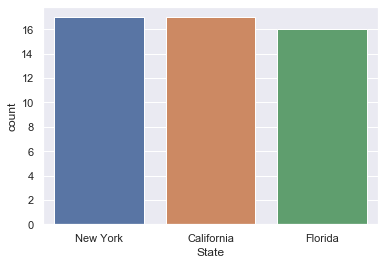

In [9]:
#plt.figure(figsize=(20,10))
sns.countplot(df['State'])

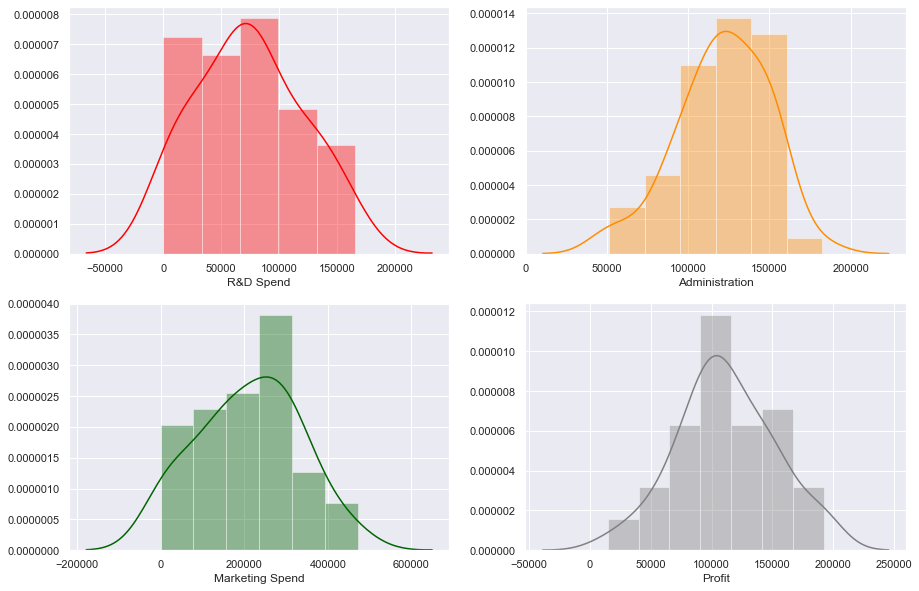

In [10]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
sns.distplot(df['R&D Spend'], ax=axes[0,0], color='red')
sns.distplot(df['Administration'], ax=axes[0,1], color='darkorange')
sns.distplot(df['Marketing Spend'], ax=axes[1,0], color='darkgreen')
sns.distplot(df['Profit'], ax=axes[1,1], color='grey')

## Creating dummy variables

In [11]:
x = df.drop(['Profit'], axis=1)
y = df['Profit']

In [12]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [13]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [14]:
X = pd.get_dummies(x, drop_first=True)
X.head(10)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (40, 5) (40,)
Test set:  (10, 5) (10,)


## Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting the Train set result

In [17]:
lr_pred_train = lr.predict(x_train)
pd.DataFrame(lr_pred_train).head()

,0
0,95764.423205
1,89164.628498
2,109506.723291
3,91366.218894
4,127111.486666


#### Predicting the Test set result

In [18]:
lr_pred_test = lr.predict(x_test)
pd.DataFrame(lr_pred_test).head()

,0
0,103015.201598
1,132582.277608
2,132447.738452
3,71976.098513
4,178537.482211
